# Geopandas Continued

In [38]:
import numpy as np
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [3]:
# create an octagon
oct_coodrs = [
    (1, 2), (2, 3), (3, 3), (4, 2), (4,1), (3, 0), (2, 0), (1, 1)
]
octagon = Polygon(oct_coodrs)
type(octagon)

shapely.geometry.polygon.Polygon

In [4]:
# create triange
trian_coords = [
    (2, 1), (3, 4), (5, 1), (2,1)]
triangle = Polygon(trian_coords)

In [12]:
# zip command
x = ['a', 'b', 3, 4]
y = [1, 2, 3, 0]
z = [0, 9, 8, 7]
k = zip(x, y, z)
h = list(k)

In [14]:
type(h[0])

tuple

Spatial Operations

In [16]:
# check whether triangle is inside octagon
is_within = triangle.within(octagon)
is_within

False

In [17]:
# check for intersection
does_intersect = octagon.intersects(triangle)
does_intersect

True

In [144]:
# create gpd for octagon and triangle
octagon_gdf = gpd.GeoDataFrame({'geometry': [octagon]}, crs="EPSG:4326")
triangle_gdf = gpd.GeoDataFrame({'geometry': [triangle]}, crs="EPSG:4326")

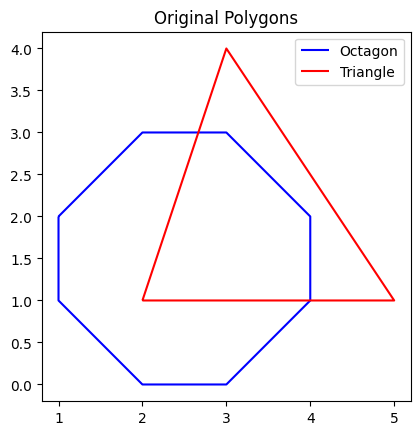

In [145]:
# Plot the polygons
fig, ax = plt.subplots()
octagon_gdf.boundary.plot(ax=ax, color='blue', label='Octagon')
triangle_gdf.boundary.plot(ax=ax, color='red', label='Triangle')
plt.legend()
plt.title('Original Polygons')
plt.show()

In [20]:
# intersection
intersection = gpd.overlay(octagon_gdf, triangle_gdf, how='intersection')

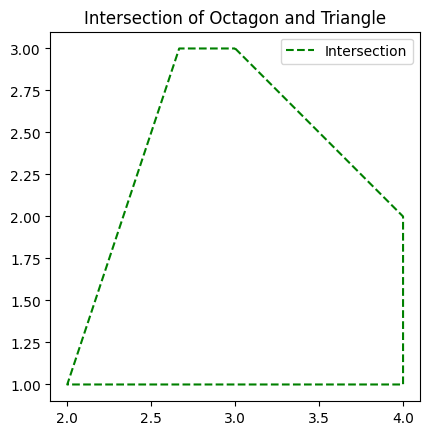

In [147]:
# Plot the original polygons and their intersection, remove '#' to plot polygons
fig, ax = plt.subplots()
#octagon_gdf.boundary.plot(ax=ax, color='blue', label='Octagon')
#triangle_gdf.boundary.plot(ax=ax, color='red', label='Triangle')
intersection.boundary.plot(ax=ax, color='green', linestyle='--', label='Intersection')
plt.legend()
plt.title('Intersection of Octagon and Triangle')
plt.show()

In [25]:
# extract the coordinates of the intersected polygon
if not intersection.empty:
    intersected_polygon = intersection.iloc[0].geometry
    print(list(intersected_polygon.exterior.coords))

else:
    print('no intersection')

[(3.0, 3.0), (4.0, 2.0), (4.0, 1.0), (2.0, 1.0), (2.6666666666666665, 3.0), (3.0, 3.0)]


In [27]:
# claculate area
area = intersected_polygon.area
area

2.8333333333333335

In [31]:
# calculate perimiter
perimeter = intersected_polygon.length
perimeter

float

In [34]:
# calculate centroid
centroid = intersected_polygon.centroid
(centroid.x, centroid.y)

(3.0653594771241828, 1.803921568627451)

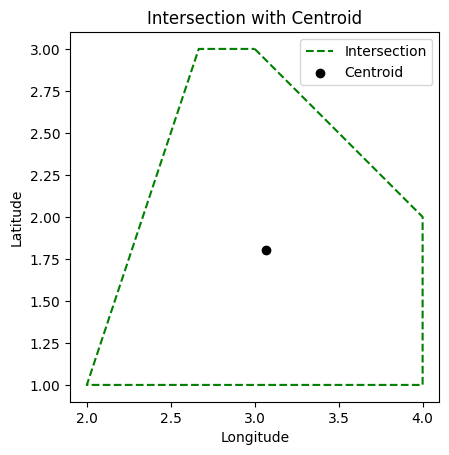

In [35]:
# Plot the intersected polygon with centroid
fig, ax = plt.subplots()
intersection.boundary.plot(ax=ax, color='green', linestyle='--', label='Intersection')
plt.scatter(centroid.x, centroid.y, color='black', label='Centroid')
plt.legend()
plt.title('Intersection with Centroid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [47]:
# buffer
buffer_octagon = octagon.buffer(0.1)
buffer_gdf = gpd.GeoDataFrame({'geometry': [buffer_octagon]}, crs= "EPSG:4326")

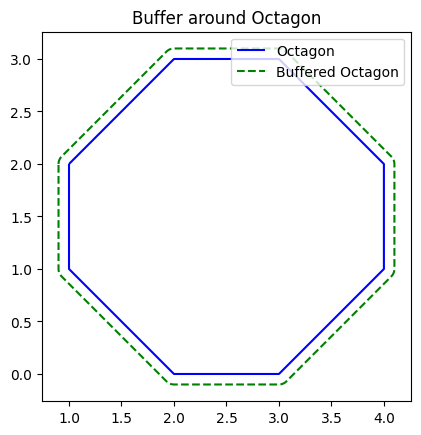

In [48]:
# Plot the original and buffered polygons
fig, ax = plt.subplots()
octagon_gdf.boundary.plot(ax=ax, color='blue', label='Octagon')
buffer_gdf.boundary.plot(ax=ax, color='green', linestyle='--', label='Buffered Octagon')
plt.legend()
plt.title('Buffer around Octagon')
plt.show()

In [49]:
combined_gdf = gpd.GeoDataFrame({'geometry': [octagon, triangle]}, crs= octagon_gdf.crs)

In [50]:
# dissolve
dissolved = combined_gdf.dissolve()

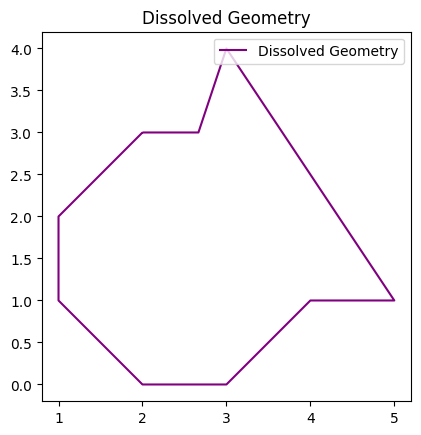

In [51]:
# Plot the dissolved geometry
fig, ax = plt.subplots()
dissolved.boundary.plot(ax=ax, color='purple', label='Dissolved Geometry')
plt.legend()
plt.title('Dissolved Geometry')
plt.show()

In [53]:
# generate random points
import random
points = [Point(random.uniform(0, 6), random.uniform(0, 5)) for _ in range(20)]
point_gdf = gpd.GeoDataFrame({'geometry' : points}, crs= combined_gdf.crs)

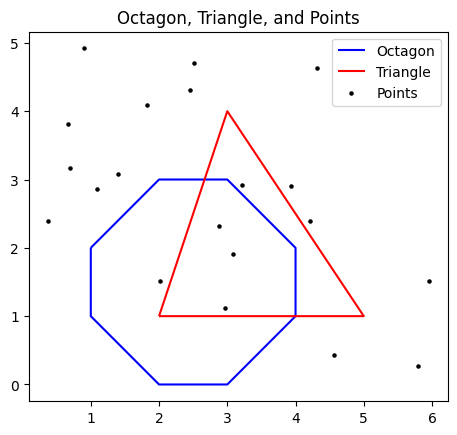

In [54]:
# Plot the original polygons and points
fig, ax = plt.subplots()
octagon_gdf.boundary.plot(ax=ax, color='blue', label='Octagon')
triangle_gdf.boundary.plot(ax=ax, color='red', label='Triangle')
point_gdf.plot(ax=ax, color='black', markersize=5, label='Points')
plt.legend()
plt.title('Octagon, Triangle, and Points')
plt.show()

In [57]:
# spatial join
joined_gdf = gpd.sjoin(point_gdf, triangle_gdf, how='inner', op= 'within')

C:\Users\Shubham\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


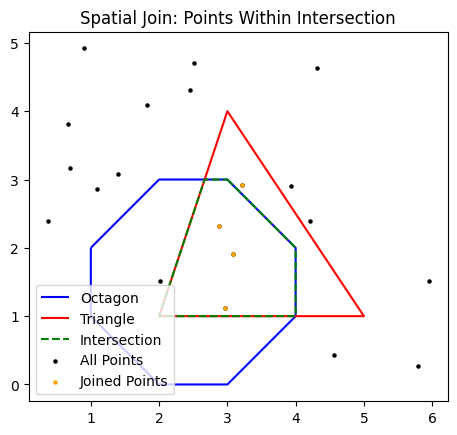

                  geometry  index_right
1  POINT (2.96050 1.11404)            0
2  POINT (3.08411 1.91637)            0
5  POINT (2.88115 2.31409)            0
8  POINT (3.22047 2.91343)            0


In [58]:
# Plot the results
fig, ax = plt.subplots()
octagon_gdf.boundary.plot(ax=ax, color='blue', label='Octagon')
triangle_gdf.boundary.plot(ax=ax, color='red', label='Triangle')
intersection.boundary.plot(ax=ax, color='green', linestyle='--', label='Intersection')
point_gdf.plot(ax=ax, color='black', markersize=5, label='All Points')
joined_gdf.plot(ax=ax, color='orange', markersize=5, label='Joined Points')
plt.legend()
plt.title('Spatial Join: Points Within Intersection')
plt.show()

# Print the joined points
print(joined_gdf)

# Demonstration : Shape files, Ganga shape

In [149]:
# load shape files, here we are loading one individual sub-basin, you need to load only .shp file
gdf = gpd.read_file("C:/Users/Shubham/Desktop/PandasTutorial/G/G/G47.shp")

<AxesSubplot: >

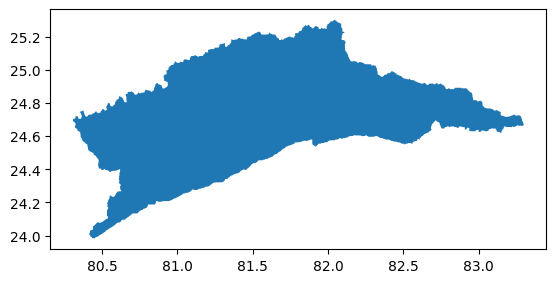

In [150]:
gdf.plot()

In [151]:
# create a function to generate path names
def generate_path(name):
    return f"C:/Users/Shubham/Desktop/PandasTutorial/G/G/{name}.shp"

In [152]:
# list of shape file names
shapefile_name = [f"G{i}" for i in range(1, 89)]
shapefile_name

['G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'G7',
 'G8',
 'G9',
 'G10',
 'G11',
 'G12',
 'G13',
 'G14',
 'G15',
 'G16',
 'G17',
 'G18',
 'G19',
 'G20',
 'G21',
 'G22',
 'G23',
 'G24',
 'G25',
 'G26',
 'G27',
 'G28',
 'G29',
 'G30',
 'G31',
 'G32',
 'G33',
 'G34',
 'G35',
 'G36',
 'G37',
 'G38',
 'G39',
 'G40',
 'G41',
 'G42',
 'G43',
 'G44',
 'G45',
 'G46',
 'G47',
 'G48',
 'G49',
 'G50',
 'G51',
 'G52',
 'G53',
 'G54',
 'G55',
 'G56',
 'G57',
 'G58',
 'G59',
 'G60',
 'G61',
 'G62',
 'G63',
 'G64',
 'G65',
 'G66',
 'G67',
 'G68',
 'G69',
 'G70',
 'G71',
 'G72',
 'G73',
 'G74',
 'G75',
 'G76',
 'G77',
 'G78',
 'G79',
 'G80',
 'G81',
 'G82',
 'G83',
 'G84',
 'G85',
 'G86',
 'G87',
 'G88']

In [153]:
# gpd for all subbasins
geodataframes = [gpd.read_file(generate_path(name)) for name in shapefile_name]

In [154]:
# Concatenation
combined_gdf = gpd.GeoDataFrame(pd.concat(geodataframes, ignore_index=True))
combined_gdf

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,4060895960,4060876840,4060025450,4060025450,2191.9,2191.9,47527.1,47527.9,452482,0,0,4,1256,"POLYGON ((76.44167 26.74167, 76.44240 26.73414..."
1,4060903960,4060898630,4060025450,4060025450,2254.8,2254.8,5693.9,5694.1,452486,0,0,4,1262,"POLYGON ((76.22500 25.55417, 76.22083 25.55417..."
2,4060898630,4060896170,4060025450,4060025450,2216.2,2216.2,1361.7,61306.9,452485,0,0,3,1258,"POLYGON ((76.34167 25.59583, 76.34223 25.59804..."
3,4060908080,4060904120,4060025450,4060025450,2273.9,2273.9,29134.4,29134.4,452489,0,0,3,1269,"POLYGON ((74.85000 24.51667, 74.85057 24.51888..."
4,4060908090,4060904120,4060025450,4060025450,2273.7,2273.7,25011.9,25011.9,452488,0,0,4,1268,"POLYGON ((75.77500 23.99583, 75.77083 23.99583..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,4060026250,0,4060026250,4060026250,0.0,0.0,3404.4,3404.4,453118,0,0,1,1305,"POLYGON ((88.70833 23.33333, 88.71692 23.33421..."
84,4060026260,0,4060026260,4060026260,0.0,0.0,9465.8,9465.8,453119,0,1,0,1306,"MULTIPOLYGON (((88.88611 21.54583, 88.86866 21..."
85,4060878430,4060888130,4060025450,4060025450,1795.9,1795.9,39.7,215766.1,452479,0,0,2,1248,"POLYGON ((79.25833 26.49167, 79.25955 26.49640..."
86,4060856790,4060911460,4060025450,4060025450,1698.9,1698.9,29.3,75010.8,452463,0,0,3,1240,"POLYGON ((79.85000 27.17917, 79.85035 27.18159..."


<AxesSubplot: >

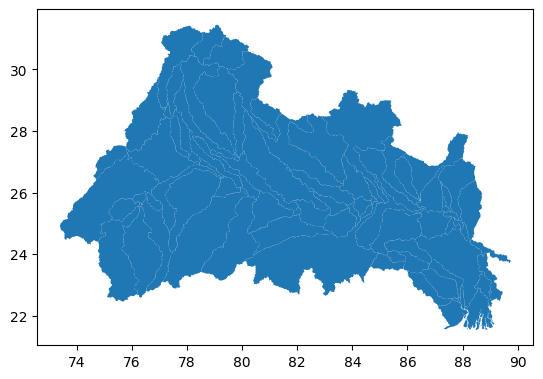

In [155]:
combined_gdf.plot()

In [156]:
combined_gdf['geometry']

0     POLYGON ((76.44167 26.74167, 76.44240 26.73414...
1     POLYGON ((76.22500 25.55417, 76.22083 25.55417...
2     POLYGON ((76.34167 25.59583, 76.34223 25.59804...
3     POLYGON ((74.85000 24.51667, 74.85057 24.51888...
4     POLYGON ((75.77500 23.99583, 75.77083 23.99583...
                            ...                        
83    POLYGON ((88.70833 23.33333, 88.71692 23.33421...
84    MULTIPOLYGON (((88.88611 21.54583, 88.86866 21...
85    POLYGON ((79.25833 26.49167, 79.25955 26.49640...
86    POLYGON ((79.85000 27.17917, 79.85035 27.18159...
87    POLYGON ((87.85417 22.60000, 87.85833 22.60000...
Name: geometry, Length: 88, dtype: geometry

In [157]:
print(gdf.crs)
print(combined_gdf.crs)

EPSG:4326
EPSG:4326


In [158]:
gdf = gdf.to_crs(epsg=32644)
combined_gdf = combined_gdf.to_crs(epsg=32644)

In [159]:
print(gdf.crs)
print(combined_gdf.crs)

EPSG:32644
EPSG:32644


In [197]:
# calculate the bounding box
bounding_box = combined_gdf.total_bounds
bounding_box

array([-270345.90467614, 2397123.54822408, 1393987.45056696,
       3482002.46108216])

In [198]:
minx, miny, maxx, maxy = bounding_box

In [199]:
from shapely.geometry import box

In [200]:
# creating the rectangle aroung Ganga
rectangle = gpd.GeoSeries([box(minx, miny, maxx, maxy)], crs= combined_gdf.crs)

<AxesSubplot: >

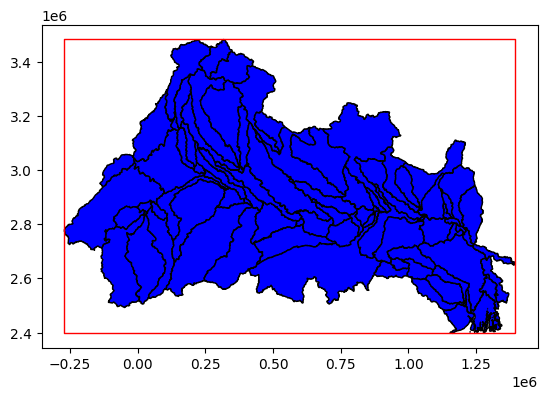

In [201]:
ax = combined_gdf.plot(color='blue', edgecolor='k')
rectangle.plot(ax=ax, color='none', edgecolor='red')

In [202]:
rectangle = rectangle.buffer(12000)

<AxesSubplot: >

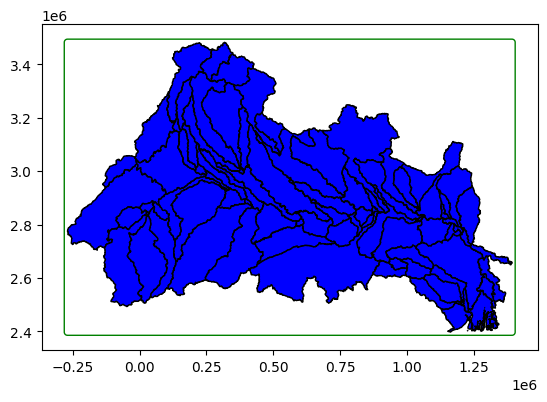

In [203]:
ax = combined_gdf.plot(color='blue', edgecolor='k')
rectangle.plot(ax=ax, color='none', edgecolor='green')

In [204]:
bound = rectangle.total_bounds

In [205]:
minx, miny, maxx, maxy = bounding_box

In [206]:
x_values = []

current_x = minx
increment = 80000

while current_x <= maxx:
    x_values.append(current_x)
    current_x += increment

In [207]:
y_values = []
current_y = miny
increment = 80000

while current_y <= maxy:
    y_values.append(current_y)
    current_y += increment

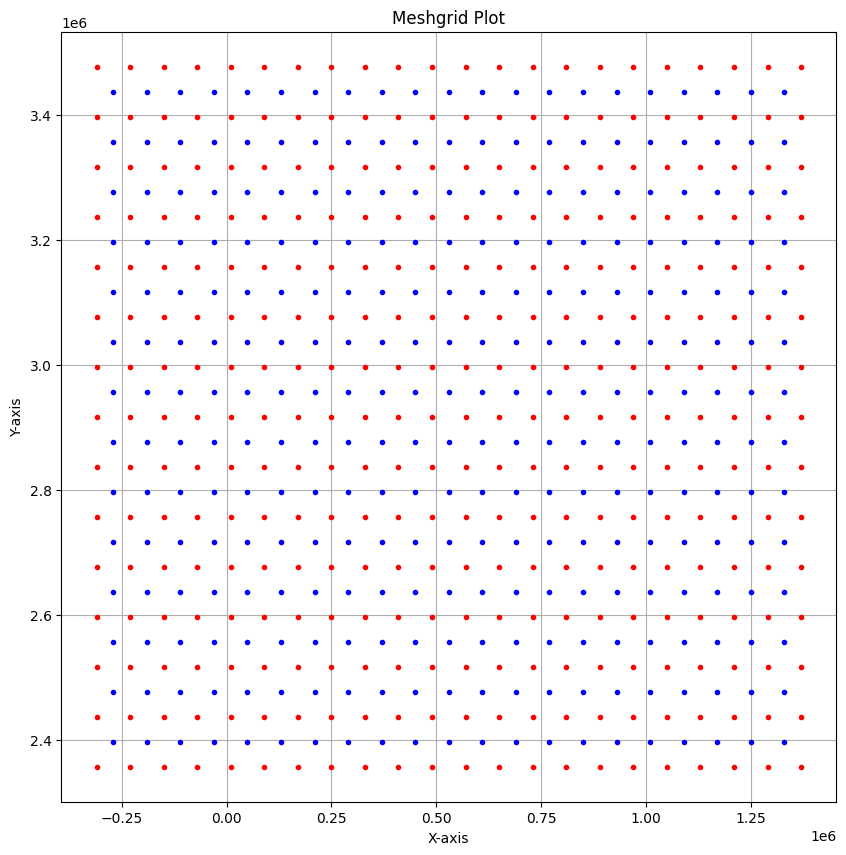

In [212]:
# we have 41 x values and 61 y values, to create all grid points (41 * 61), we will use meshgrid in numpy
X, Y = np.meshgrid(x_values, y_values)


# plot to visualize
plt.figure(figsize=(10, 10))
plt.plot(X, Y, marker='.', color='b', linestyle='none')  # Plot grid points
plt.plot(X1, Y1, marker='.', color='r', linestyle='none')  # Plot grid points

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Meshgrid Plot')
plt.grid(True)
plt.show()

In [209]:
# function to calculate grid parameters, try to understand it
def calculate_grid_parameters(coord):
    d = np.diff(coord)[0] / 2
    cell_boundaries = np.concatenate([[coord[0] - d], coord + d])
    return cell_boundaries

In [210]:
x_cord = calculate_grid_parameters(x_values)
y_cord = calculate_grid_parameters(y_values)

In [211]:
X1, Y1 = np.meshgrid(x_cord, y_cord)

In [213]:
# function to create grid cell taking arguments from x_values and y_values
def initialize_and_populate_grid(x_values, y_values):
    ngrid_cell = len(x_values) * len(y_values)
    grid_cell = [{} for _ in range(ngrid_cell)]
    
    dy = y_values[1] - y_values[0]
    k = 0
    
    loncell = calculate_grid_parameters(x_values)
    latcell = calculate_grid_parameters(y_values)
    
    for i, lon in enumerate(x_values):
        for j, lat in enumerate(y_values):
            x_coords = [loncell[i], loncell[i], loncell[i+1], loncell[i+1], loncell[i]]
            y_coords = [latcell[j], latcell[j+1], latcell[j+1], latcell[j], latcell[j]] if dy > 0 else \
                       [latcell[j+1], latcell[j], latcell[j], latcell[j+1], latcell[j+1]]
            
            grid_cell[k] = {'X': x_coords, 'Y': y_coords, 'Xc': lon, 'Yc': lat}
            k += 1
    return grid_cell

In [214]:
grid_cell = initialize_and_populate_grid(x_values, y_values)
grid_cell

[{'X': [-310345.90467614017,
   -310345.90467614017,
   -230345.90467614017,
   -230345.90467614017,
   -310345.90467614017],
  'Y': [2357123.548224084,
   2437123.548224084,
   2437123.548224084,
   2357123.548224084,
   2357123.548224084],
  'Xc': -270345.90467614017,
  'Yc': 2397123.548224084},
 {'X': [-310345.90467614017,
   -310345.90467614017,
   -230345.90467614017,
   -230345.90467614017,
   -310345.90467614017],
  'Y': [2437123.548224084,
   2517123.548224084,
   2517123.548224084,
   2437123.548224084,
   2437123.548224084],
  'Xc': -270345.90467614017,
  'Yc': 2477123.548224084},
 {'X': [-310345.90467614017,
   -310345.90467614017,
   -230345.90467614017,
   -230345.90467614017,
   -310345.90467614017],
  'Y': [2517123.548224084,
   2597123.548224084,
   2597123.548224084,
   2517123.548224084,
   2517123.548224084],
  'Xc': -270345.90467614017,
  'Yc': 2557123.548224084},
 {'X': [-310345.90467614017,
   -310345.90467614017,
   -230345.90467614017,
   -230345.90467614017,
  

In [215]:
# creating a geodataframe for grid cells as polygons
from shapely.geometry import Polygon

grid_cells = []

for cell in grid_cell:
    polygon = Polygon(list(zip(cell['X'], cell['Y'])))
    grid_cells.append(polygon)

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)

grid_gdf.head()

,geometry
0,"POLYGON ((-310345.905 2357123.548, -310345.905..."
1,"POLYGON ((-310345.905 2437123.548, -310345.905..."
2,"POLYGON ((-310345.905 2517123.548, -310345.905..."
3,"POLYGON ((-310345.905 2597123.548, -310345.905..."
4,"POLYGON ((-310345.905 2677123.548, -310345.905..."


In [216]:
dissolved_gdf = combined_gdf.dissolve()

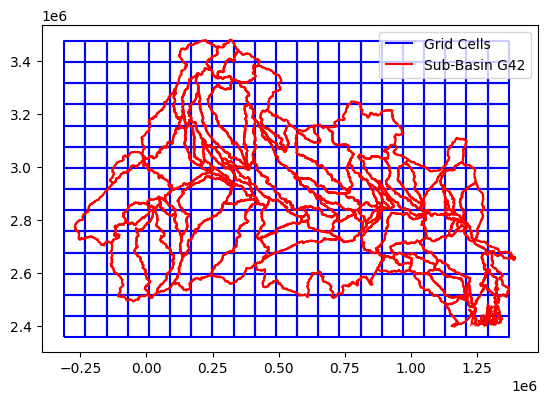

In [217]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
grid_gdf.boundary.plot(ax=ax, color='blue', label='Grid Cells')
combined_gdf.boundary.plot(ax=ax, color='red', label='Sub-Basin G42') # you also plot dissolved gdf along with the grid
plt.legend()
plt.show()

In [218]:
# sometimes you may encounter with invalid geometries
i = 0
for geom in combined_gdf['geometry']:
    if not geom.is_valid:
        print('Invalid geometry:', i, geom)
    i += 1

Invalid geometry: 8 POLYGON ((71542.14247652533 2832270.538078304, 70877.57995916554 2832252.6792569896, 70514.55499365507 2831880.1469790624, 69675.95459433796 2831828.715361181, 68460.24401152955 2833256.130740177, 66297.64065802918 2833404.818269346, 64950.62201591255 2834987.830717274, 64896.76129490667 2835531.4203897887, 64361.18382324139 2836165.387199611, 63872.645541871665 2836260.39195087, 63534.65390360006 2836655.732741214, 63292.01423016848 2836702.9328292543, 63307.18495119171 2837165.177012914, 63404.86644360755 2837530.2102046735, 64092.66521273245 2837700.7068468477, 64256.11543187301 2838767.766180545, 64586.44183088583 2839206.538077828, 63881.54799227504 2840140.0248865676, 63813.88722597866 2841558.714982234, 62715.56910682464 2842954.837168149, 62617.63478520722 2843449.0589737203, 62327.04248836287 2843893.1482915455, 62293.33970810892 2844602.512946588, 61036.43601244432 2844644.046632954, 60905.823933008534 2844156.2135893214, 60418.6796685984 2844601.498695753

In [219]:
# you can use shapely.validation to get the explanation of invalidity
from shapely.validation import explain_validity

geometry = combined_gdf['geometry'][8]
explain_validity(geometry)

'Ring Self-intersection[54615.7226493743 2865684.52396639]'

In [221]:
# in most of the cases buffer operation will solve the issue
combined_gdf['geometry'][84] = combined_gdf['geometry'][84].buffer(0)